In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df = pd.read_csv("/kaggle/input/lic-stock-price-data/LICI - Daily data.csv")
df.head()


,Date,Open,High,Low,Close
0,Tue May 17 2022 00:00:00 GMT+0530 (India Stand...,872.00,918.95,860.00,875.25
1,Wed May 18 2022 00:00:00 GMT+0530 (India Stand...,885.55,891.00,874.10,876.35
2,Thu May 19 2022 00:00:00 GMT+0530 (India Stand...,867.00,867.00,838.00,840.85
3,Fri May 20 2022 00:00:00 GMT+0530 (India Stand...,848.55,856.80,825.00,826.15
4,Mon May 23 2022 00:00:00 GMT+0530 (India Stand...,826.15,852.70,803.65,816.85


In [39]:
df["Price_Movement"] = np.where(df["Close"] > df["Open"], 1, 0)


In [40]:
df.isnull().sum()


Date              0
Open              0
High              0
Low               0
Close             0
Price_Movement    0
dtype: int64

In [41]:
df = df.dropna()


In [42]:
X = df[["Open", "High", "Low"]]
y = df["Price_Movement"]


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)


In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [46]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [47]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [48]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)


In [49]:
precision_score(y_test, y_pred, zero_division=0)


0.2

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.2
Precision: 0.2
Recall: 1.0
F1 Score: 0.3333333333333333


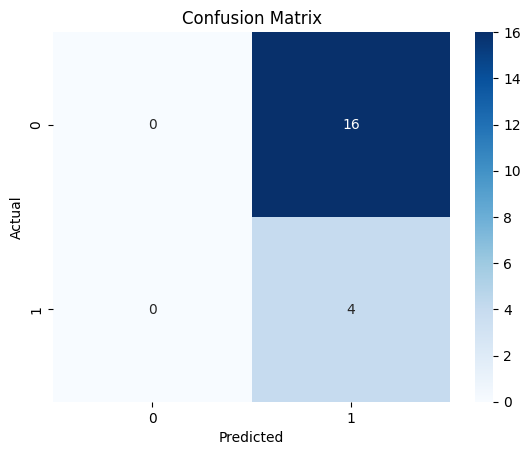

In [51]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


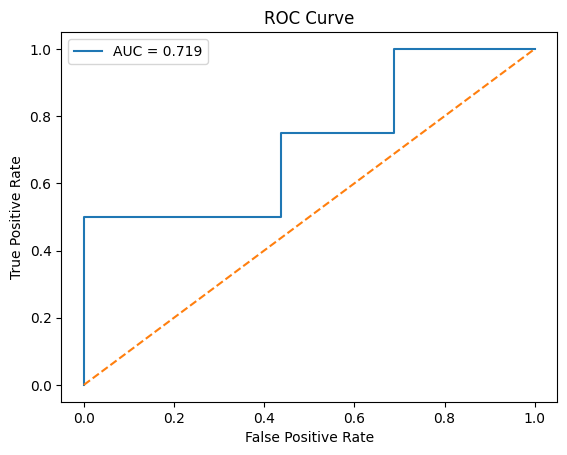

In [52]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label="AUC = " + str(round(auc, 3)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


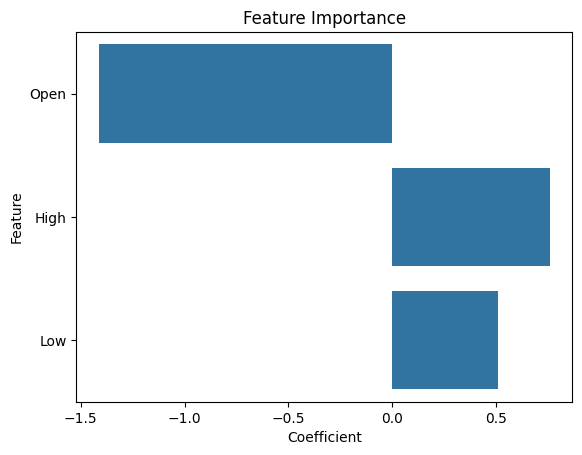

In [53]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()


In [54]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [55]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [56]:
y_best_pred = best_model.predict(X_test)

print(classification_report(y_test, y_best_pred))


              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.67      1.00      0.80         4

    accuracy                           0.90        20
   macro avg       0.83      0.94      0.87        20
weighted avg       0.93      0.90      0.91        20

